<h1> Dimensionality Reduction: Introduction </h1>


<h2> Project Proposal </h2>


The objective of this project is to reduce the tabular data's dimensionality, breaking down the range of disparate values into vectors which combine the meaninfgul signal contained in the data sources I have aggregated. This can enable faster processing of the data in other analyses such as decision trees or regression models, and it will also enable better performance by excluding noise from the data where possible. In terms of tools: I will use Python's scikit learn and its sub-package scikit learn.metrics, particularly the PCA and tSNE methods, to analyze the data and attempt dimensionality reduction. 

The record dataset I will be analyzing for dimensionality reduction includes: 1 - The daily level of retail activity for the top 10 most active stock tickers, 2 - The daily change in the level of retail activity for the top 10 most active stock tickers, 3 - Weekly individual investor survey data (columns for the percent of respondents that were bearish, bullish, or neutral), 4 - Weekly change in major stock indices prices, 4 - weekly stocktwits rankings of the most active stock tickers.

The dataset described above was selected by using all of the available record data that I gathered for this project. This is because data pertaining to retail investor sentiment and trading is exceptionally scarce online, and so it makes sense to use all available data for topics such as dimensionality reduction. Text data was not used due to its fundamental differences from the record data, and computational requirements given the 10,000 columns.


<h1> Code Implementation: </h1>


In [30]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import seaborn as sns


import os
os.getcwd()



'c:\\Users\\corwi\\Documents\\dsan-5000-project-corwindark\\dsan-website\\5000-website\\dimreduction'

In [5]:
# Read data in:
tabData = pd.read_csv("../data/01-modified-data/joinedSentiment.csv") 
tabData.shape

(9560, 23)

In [50]:
# Prep data for PCA and T-SME
nonNumericColumns = ['X', "Unnamed: 0", 'week.y', 'lagweek', 'sentiment',  'date.x', 'Total', 'X8.week', 'date.x', 'ticker', 'date.y', 'deltaSentiment',  'week.x', 'weekyear', 'newEntry']

x = tabData.drop(columns = nonNumericColumns)
x = x.dropna()

xsave = x

x = x.drop(columns = ['deltaActivity'])

x.SPYCloseWK = x.SPYCloseWK.apply(lambda x: float(x.replace(",", "") ))
x.SPYHighWk = x.SPYHighWk.apply(lambda x: float(x.replace(",", "") ))
x.SPYLowWK = x.SPYLowWK.apply(lambda x: float(x.replace(",", "") ))


In [21]:
# Implement PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(x)
print('\nPCA')
print(pca.components_)

print(pca.explained_variance_ratio_ * 100)


PCA
[[-1.68248660e-06 -9.38301381e-06 -2.92182977e-05  3.85961909e-05
  -4.79948736e-05 -5.59590301e-01 -5.97065315e-01 -5.74779697e-01]
 [ 1.02733629e-05 -6.50141479e-04 -2.83986205e-04  9.34058655e-04
  -1.58436440e-03  7.83508069e-01 -6.07178267e-01 -1.32082442e-01]
 [-3.33404703e-06 -4.95640335e-05 -6.83867804e-05  1.18117062e-04
  -1.67786032e-04 -2.70132741e-01 -5.24257322e-01  8.07578178e-01]]
[99.45726907  0.34201376  0.20071211]


In [29]:
# Given that the first component explains so much of the variance, let's do PCA with only 2 components
pca = PCA(n_components=2)
pca.fit(x)
print('\nPCA')
print(pca.components_)

xpca = pca.fit_transform(x)

print(pca.explained_variance_ratio_ * 100)


PCA
[[-1.68248660e-06 -9.38301381e-06 -2.92182977e-05  3.85961909e-05
  -4.79948736e-05 -5.59590301e-01 -5.97065315e-01 -5.74779697e-01]
 [ 1.02733629e-05 -6.50141479e-04 -2.83986205e-04  9.34058655e-04
  -1.58436440e-03  7.83508069e-01 -6.07178267e-01 -1.32082442e-01]]
[99.45726907  0.34201376]


In [46]:
# Implement TSNE
from sklearn.manifold import TSNE

#xt = x.drop_duplicates()
tsne = TSNE(n_components=3, random_state=21)
X_tsne = tsne.fit_transform(x)
tsne.kl_divergence_




-4.008790016174316

In [32]:
# Parameter tuning for TSNE
kl_divergences =  []  
# first val is perplexity, second is KL divergence

for i in range(1,10):
    print(i)
    tsne = TSNE(n_components=2, perplexity= i, random_state=21)
    X_tsne = tsne.fit_transform(x)
    kl = tsne.kl_divergence_
    kl_divergences.append([ [i], [kl] ])

print(kl_divergences)


1
2
3
4
5
6
7
8
9
[[[1], [-0.40658706426620483]], [[2], [-0.4820026159286499]], [[3], [-0.505386471748352]], [[4], [-0.7875299453735352]], [[5], [-0.9650571346282959]], [[6], [-1.0686755180358887]], [[7], [-1.1880613565444946]], [[8], [-1.2203705310821533]], [[9], [-1.407416820526123]]]


(9, 2)
  Perplexity           KL_Divergence
0        [1]  [-0.40658706426620483]
1        [2]   [-0.4820026159286499]
2        [3]    [-0.505386471748352]
3        [4]   [-0.7875299453735352]
4        [5]   [-0.9650571346282959]
   Perplexity  KL_Divergence
0           1      -0.406587
1           2      -0.482003
2           3      -0.505386
3           4      -0.787530
4           5      -0.965057


AttributeError: 'numpy.ndarray' object has no attribute 'kl_divergence_'

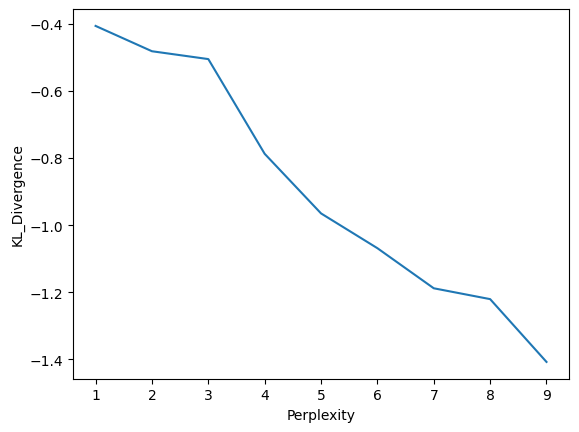

In [45]:
kls = pd.DataFrame(kl_divergences)
#print(kls.shape)
kls.columns = ['Perplexity', 'KL_Divergence']
#print(kls.head())
kls.Perplexity = kls.Perplexity.apply(lambda x: x[0])
kls.KL_Divergence = kls.KL_Divergence.apply(lambda x: x[0])

#print(kls.head())
#kls = pd.DataFrame(kl_divergences, columns = ['Perplexity', 'KL_Divergence']) 
sns.lineplot(kls, x = 'Perplexity', y = 'KL_Divergence') 


From looking at the plot of perplexity versus KL divergence, it appears that the lower values of perplexity performed better and yielded a KL divergence closer to 0. As such, I would use perplexity = 1 for this model.

<h1> Project Report </h1>

Let's start with the results of the principle component analysis:

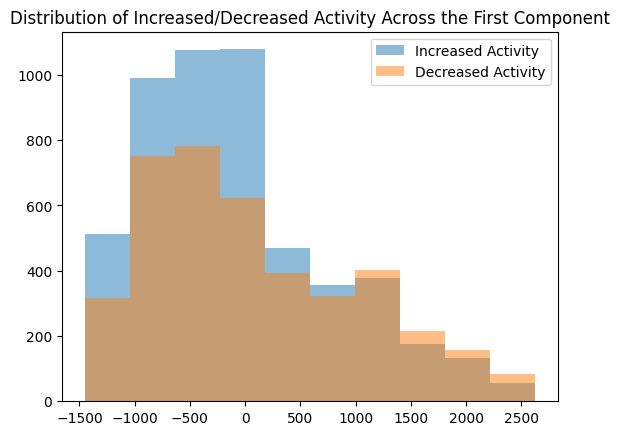

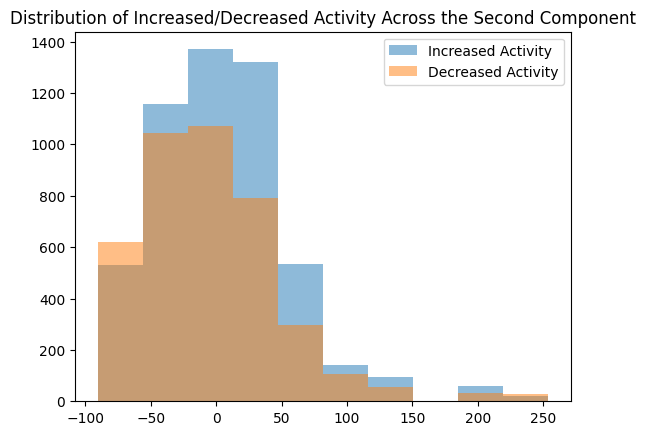

In [74]:
increaseActivity = (xsave['deltaActivity'] > 0)
increaseActivity.head()

#plt.hist(xpca[:,0], hue=increaseActivity)
#plt.show()



plt.hist(xpca[increaseActivity,0],  
         alpha=0.5, # the transaparency parameter 
         label='Increased Activity') 
  
plt.hist(xpca[~(increaseActivity),0],  
         alpha=0.5, # the transaparency parameter 
         label='Decreased Activity') 
plt.title("Distribution of Increased/Decreased Activity Across the First Component")
plt.legend()
plt.show()


plt.hist(xpca[increaseActivity,1],  
         alpha=0.5, # the transaparency parameter 
         label='Increased Activity') 
  
plt.hist(xpca[~(increaseActivity),1],  
         alpha=0.5, # the transaparency parameter 
         label='Decreased Activity') 

plt.title("Distribution of Increased/Decreased Activity Across the Second Component")
plt.legend()
plt.show()


As seen above, the PCA method does not produce principle components which are very good at splitting our data into the classes we care about. However, there is a noticeable difference between the classes in the first principle component especially, where higher values had more decreases in activity, and lower values had less. This should be enough on its own to outperform a simple random classifier, so it is not entirely a waste.